# Conditional DCA
Testing whether conditional DCA beats regular DCA assuming price goes up eventually

In [219]:
import pandas as pd
import numpy as np 
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import random

In [28]:
res = requests.get(
    "https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=400&interval=daily"
).json()

In [42]:
df = pd.DataFrame(index=[datetime.fromtimestamp(i[0]/1000) for i in res["prices"]], 
                 columns=["price"], data=[i[1] for i in res["prices"]])

In [107]:
# results = pd.DataFrame(columns=["name", "total_spent", "avg_price", "result"])

In [109]:
class Result:
    def __init__(self, name, total_spent, avg_price, result):
        self.name = name
        self.total_spent = total_spent
        self.avg_price = avg_price
        self.result = result
        
    def json(self):
        return {"name":self.name, "total_spent": self.total_spent, "avg_price": self.avg_price, "result":self.result}
    

In [44]:
# df_saved = df[:]

In [199]:
df = df_saved[:]

In [297]:
DCA = 50
def regular_dca(df):
    acc = (DCA/df.price).cumsum()
    df["dca"] = acc
    # results["name"] = "DCA"
    # results["total_spent"] = DCA*len(acc)
    # results["avg_price"] = acc[-1]
    # return Result("DCA", DCA*len(acc), DCA*len(acc)/acc.loc[-1], result = acc.loc[-1])
def c_dca(df, m):
    diff = (df.price - df.price.shift())/df.price
    # buy = -100*m*diff
    # amt = buy/df.price.shift()
    # b_cs = buy.cumsum()
    
    acc = [0]
    usd = 0
    spend = []
    for i in range(len(diff)):
        usd += DCA
        if diff[i] < 0:
            buy = -100*m*diff[i]
            if usd > buy:
                usd -= buy
                spend.append(buy)
                acc.append(acc[-1] + buy/df.price.iloc[i])
            else:
                acc.append(acc[-1]+ usd/df.price.iloc[i])
                spend.append(usd)
                usd = 0
        else:
            acc.append(acc[-1])
            spend.append(0)
    df[f"c_dca_spend_{m}"] = spend[:]
    df[f"c_dca_{m}"] = acc[1:]
    
    return Result(f"c_dca_{m}", sum(spend), sum(spend)/acc[-1], acc[-1])
def neg_dca(df):
    diff = (df.price - df.price.shift())/df.price
    buy = (DCA*2)/df.price
    acc = []
    buy_acc = 0
    for i in range(len(diff)):
        if diff[i] < 0:
            acc.append(buy[i])
            buy_acc += DCA*2
        else:
            acc.append(0)
    cumsum = pd.Series(acc).cumsum()
    # return cumsum
    df[f"neg_dca"] = cumsum.to_list()
    return Result(f"neg_dca", buy_acc, buy_acc/cumsum.iloc[-1], cumsum.iloc[-1])
    

In [213]:
r = regular_dca(df)
c20 = c_dca(df, 20)
c30 = c_dca(df, 30)
c50 = c_dca(df, 50)
c10 = c_dca(df, 10)
n = neg_dca(df)

/var/folders/4n/h7p57sb17sn7vtrtjz3m1xhr0000gn/T/ipykernel_34149/2456226291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dca"] = acc
/var/folders/4n/h7p57sb17sn7vtrtjz3m1xhr0000gn/T/ipykernel_34149/2456226291.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"c_dca_spend_{m}"] = spend[:]
/var/folders/4n/h7p57sb17sn7vtrtjz3m1xhr0000gn/T/ipykernel_34149/2456226291.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [214]:
n

In [215]:
r.json()

{'name': 'DCA',
 'total_spent': 20050,
 'avg_price': 2468.6597737980505,
 'result': 8.121815817962203}

In [216]:
c30.json()

{'name': 'c_dca_30',
 'total_spent': 19645.16607667679,
 'avg_price': 2405.5336278502236,
 'result': 8.166656183573403}

In [217]:
df

,price,dca,c_dca_spend_20,c_dca_20,c_dca_spend_30,c_dca_30,c_dca_spend_50,c_dca_50,c_dca_spend_10,c_dca_10,neg_dca
2021-07-21 17:00:00,2003.723921,0.024954,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2021-07-22 17:00:00,2027.533448,0.049614,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2021-07-23 17:00:00,2117.154608,0.073231,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2021-07-24 17:00:00,2183.627415,0.096128,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2021-07-25 17:00:00,2209.499360,0.118758,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-21 17:00:00,1624.149983,8.000979,0.000000,6.313228,0.000000,8.155825,0.0,8.372352,0.000000,3.156614,7.908490
2022-08-22 17:00:00,1622.307035,8.031800,2.272009,6.314629,3.408014,8.157925,0.0,8.372352,1.136005,3.157314,7.970131
2022-08-23 17:00:00,1665.791907,8.061815,0.000000,6.314629,0.000000,8.157925,0.0,8.372352,0.000000,3.157314,7.970131
2022-08-24 17:00:00,1657.793642,8.091976,9.649289,6.320449,14.473933,8.166656,0.0,8.372352,4.824644,3.160225,8.030452


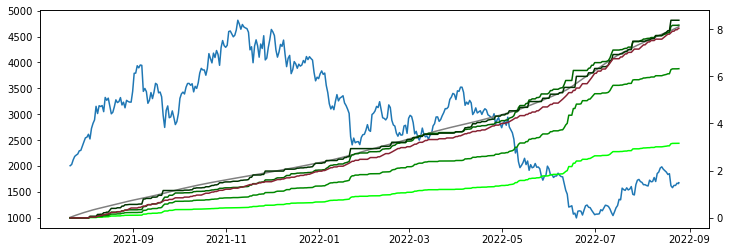

In [218]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.price)
ax1 = ax.twinx()
ax1.plot(df.dca, c="gray")
ax1.plot(df.c_dca_10, c="#00ff00")
ax1.plot(df.c_dca_20, c="#008800")
ax1.plot(df.c_dca_30, c="#006600")
ax1.plot(df.c_dca_50, c="#003300")
ax1.plot(df.neg_dca, c="#882233")

In [193]:
df

,price,dca,c_dca_spend_30,c_dca_30,c_dca_spend_50,c_dca_50,c_dca_spend_10,c_dca_10,c_dca_spend_20,c_dca_20,neg_dca
2021-07-21 17:00:00,2003.723921,0.024954,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2021-07-22 17:00:00,2027.533448,0.049614,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2021-07-23 17:00:00,2117.154608,0.073231,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2021-07-24 17:00:00,2183.627415,0.096128,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2021-07-25 17:00:00,2209.499360,0.118758,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-21 17:00:00,1624.149983,8.000979,0.000000,8.155825,0.0,8.372352,0.000000,3.156614,0.000000,6.313228,NaN
2022-08-22 17:00:00,1622.307035,8.031800,3.408014,8.157925,0.0,8.372352,1.136005,3.157314,2.272009,6.314629,NaN
2022-08-23 17:00:00,1665.791907,8.061815,0.000000,8.157925,0.0,8.372352,0.000000,3.157314,0.000000,6.314629,NaN
2022-08-24 17:00:00,1657.793642,8.091976,14.473933,8.166656,0.0,8.372352,4.824644,3.160225,9.649289,6.320449,NaN


In [413]:
def generate_random_price(l, m):
    acc = [2000]
    for i in range(l):
        acc.append(acc[-1]*(m*(random.uniform(0, 1)*random.uniform(0, 1))*random.uniform(-0.1, 0.1)+1))
    return acc

In [430]:
r = generate_random_price(400, 1)

In [431]:
df = pd.DataFrame(r, columns=["price"])

In [432]:
r = regular_dca(df)
c50 = c_dca(df, 50)
c100 = c_dca(df, 100)
c200 = c_dca(df, 200)
n = neg_dca(df)

In [433]:
c50.json()

{'name': 'c_dca_50',
 'total_spent': 12584.676110013015,
 'avg_price': 2387.1199137720214,
 'result': 5.271907807147931}

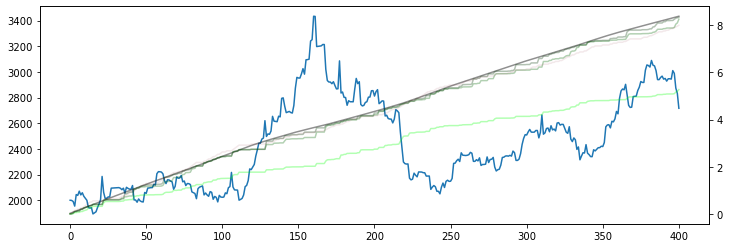

In [434]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.price)
ax1 = ax.twinx()
ax1.plot(df.dca, c="#222222", alpha=0.5)
ax1.plot(df.c_dca_50, c="#00ff00", alpha=0.3)
ax1.plot(df.c_dca_100, c="#006600", alpha=0.3)
ax1.plot(df.c_dca_200, c="#003300", alpha=0.3)
ax1.plot(df.neg_dca, c="#882233", alpha=0.1)